1. (60) Given the enclosed data set (100 data points each with two dimensional values), with no labels as a csv file
        a. Open the file and name the columns feature1, feature2.
            i.     X = pd.read_csv(‘fname', names=('feature1', 'feature2'))   
        b. The rows are the number of samples.
        c. You must use your own created algorithm based on the class notes, see page cv-11.
        d. use the two features.
        e. Use 3 random centroids.
        f. Use the L2 norm for computing the nearest centroid.
            i. Calculate the MSE, which equals to the average distance of the samples to their current centroids based on L2 norm.
        g. Stop either after n iter or when the mse does not change by much.
        h. Draw the initial and the final centroids.
        i. Draw the final clusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

def random_centroids_function(data_array, number_of_clusters):

    centroids = []
    init_centroids = random.sample(range(0, len(data_array)), number_of_clusters)
    for i in init_centroids:
        centroids.append(data_array.loc[i])
    centroids = np.array(centroids)

    return np.array(centroids)

data_array = pd.read_csv("kmeansdata_exam4.csv",header=None)
data_array.head()
data_array_to_work = np.array(data_array)

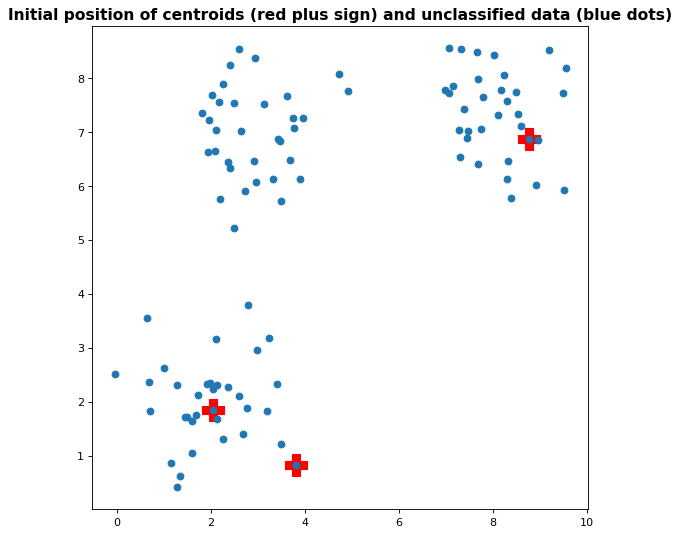

In [2]:
centroids = random_centroids_function(data_array, 3)

plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Initial position of centroids (red plus sign) and unclassified data (blue dots)', fontsize=14, fontweight='bold')
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], s=400, c='r', marker='P')
plt.scatter(data_array_to_work[:, 0], data_array_to_work[:, 1], cmap='cividis')
plt.show()

In [3]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5
def findClosestCentroids(centroids, data_array_to_work):
    assigned_centroid = []
    
    for i in range(len(data_array_to_work)):
        distance=[]
        for j in range(len(centroids)):
            distance.append(calc_distance(data_array_to_work[i], centroids[j]))
        assigned_centroid.append(np.argmin(distance))                               
    return assigned_centroid


In [4]:
def calculate_mse(centroids, assigned_centroid, data_array_to_work):
    dictionary_to_print = {}
    list_to_return = []
    for i in range(len(centroids)):
        dictionary_to_print[i] = {}
        dictionary_to_print[i]["Count"] = 0
        dictionary_to_print[i]["MSE"] = 0
    
    for i in range(len(data_array_to_work)):
        to_mean_distance = calc_distance(data_array_to_work[i], centroids[assigned_centroid[i]])
        dictionary_to_print[assigned_centroid[i]]["Count"] += 1
        dictionary_to_print[assigned_centroid[i]]["MSE"] += to_mean_distance
    
    for i in range(len(centroids)):
        dictionary_to_print[i]["MSE"] /= dictionary_to_print[i]["Count"]
        list_to_return.append(dictionary_to_print[i]["MSE"])
    return list_to_return

In [5]:
def calc_centroids(clusters, data_array_to_work):
    new_centroids = []
    new_data_to_work = pd.concat([pd.DataFrame(data_array_to_work), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    
    for cluster in set(new_data_to_work['cluster']):
        current_cluster = new_data_to_work[new_data_to_work['cluster'] == cluster][new_data_to_work.columns[:-1]]
        current_cluster=np.nan_to_num(current_cluster, copy=True, nan=0.0)
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [6]:
def final_function_to_iterate (centroids, data_array_to_work, number_of_iterations):
    number_for_while = number_of_iterations
    
    old_mse = np.zeros((1, len(centroids)))
    mse_diff_percentage = np.full((1, len(data_array_to_work[0])), 10000)
    while (number_for_while != 0) and ((np.abs(mse_diff_percentage)>0.1).all()):
        print("Iteration number:" + str(number_of_iterations-number_for_while+1))
        get_centroids = findClosestCentroids(centroids, data_array_to_work)
        centroids = calc_centroids(get_centroids, data_array_to_work)
        new_mse = calculate_mse(centroids, get_centroids, data_array_to_work)
        mse_diff_percentage = np.abs(np.subtract(new_mse,old_mse))
        old_mse=new_mse.copy()
        print("MSE Difference in percentage: " + str(np.abs(mse_diff_percentage)))
        if ((number_for_while == 0) or ((np.abs(mse_diff_percentage)<=0.1).all())):
            break
        number_for_while -=1
    plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
    plt.title('Final position of centroids (red plus sign) and classified data', fontsize=14, fontweight='bold')
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], s=400, c='r', marker='P')
    plt.scatter(data_array_to_work[:, 0], data_array_to_work[:, 1], c=get_centroids, cmap='cividis')
    plt.show()
        

Iteration number:1
MSE Difference in percentage: [[1.7387088  2.44744948 0.24959965]]
Iteration number:2
MSE Difference in percentage: [0.2678653  0.32120249 0.61288581]
Iteration number:3
MSE Difference in percentage: [0.35837382 0.99039427 0.09970323]


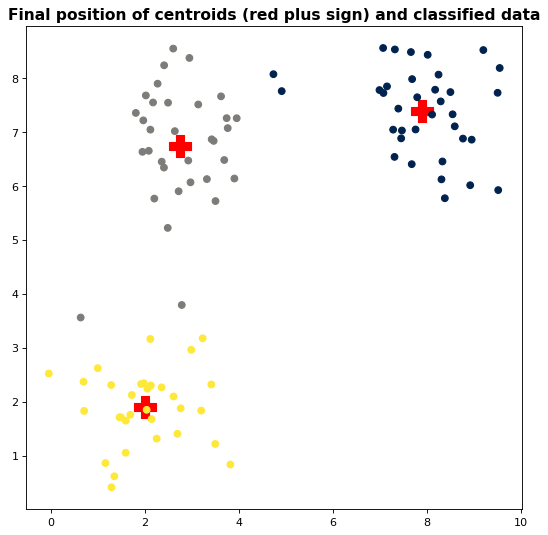

In [7]:
final_function_to_iterate (centroids, data_array_to_work, 15)

2.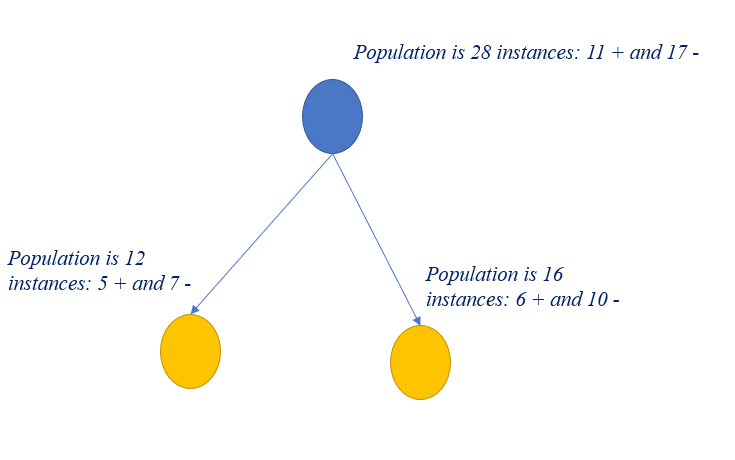 
(40) Based on the Gain in Impurity formula, given the following node with current members (with their classification (+/-) with respect to hypothesis such as the person is healthy or not, you should be able to computer the gain in impurity based on the entropy property 
        a. Show all the details for full credit.
            i. Formula and calculations

In [8]:
array_initial = [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
array_split_1_left_child = [1,1,1,1,1,0,0,0,0,0,0,0]
array_split_1_right_child = [1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]



In [9]:
def calculate_entropy(array_to_check):
    dictionary_to_count = {}
    for item in array_to_check:
        if (item in dictionary_to_count):
            dictionary_to_count[item] += 1
        else:
            dictionary_to_count[item] = 1
    
    to_entropy = 0
    
    for key in dictionary_to_count:
        dictionary_to_count[key] /= len(array_to_check)
        
    for key in dictionary_to_count:
        to_entropy += dictionary_to_count[key]*np.log2(dictionary_to_count[key])
        
    to_entropy *= -1
    return to_entropy
    
def impurity_gain_entropy(array_to_check_parent, child_arrays):
    parent_entropy = calculate_entropy(array_to_check_parent)
    children_entropy = 0
    for child in child_arrays:
        children_entropy += ((len(child)/len(array_to_check_parent))*calculate_entropy(child))
    return (parent_entropy - children_entropy)
def best_entropy_split(array_to_check_parent, child_arrays1, child_arrays2):
    splits = [impurity_gain_entropy(array_to_check_parent, child_arrays1), impurity_gain_entropy(array_to_check_parent, child_arrays2)]
    print("Maximal ENTROPY gain " + str(np.max(splits)) + " is relevant for the split with index " + str(np.argmax(splits)))
    
def calculate_gini(array_to_check):
    dictionary_to_count = {}
    for item in array_to_check:
        if (item in dictionary_to_count):
            dictionary_to_count[item] += 1
        else:
            dictionary_to_count[item] = 1
    
    to_gini = 0
    
    for key in dictionary_to_count:
        dictionary_to_count[key] /= len(array_to_check)
        to_gini += (dictionary_to_count[key]**2)
        
    to_gini = 1-to_gini
    return to_gini
    
def impurity_gain_gini(array_to_check_parent, child_arrays):
    parent_gini = calculate_gini(array_to_check_parent)
    children_gini = 0
    for child in child_arrays:
        children_gini += ((len(child)/len(array_to_check_parent))*calculate_gini(child))
    return (parent_gini - children_gini)
def best_gini_split(array_to_check_parent, child_arrays1, child_arrays2):
    splits = [impurity_gain_gini(array_to_check_parent, child_arrays1), impurity_gain_gini(array_to_check_parent, child_arrays2)]
    print("Maximal GINI gain " + str(np.max(splits)) + " is relevant for the split with index " + str(np.argmax(splits)))

In [10]:
print("Parent's entropy is " + str(calculate_entropy(array_initial)))
print("Left child's entropy is " + str(calculate_entropy(array_split_1_left_child)))
print("Right child's entropy is " + str(calculate_entropy(array_split_1_right_child)))
print("Impurity gain is " + str(impurity_gain_entropy(array_initial, [array_split_1_left_child,array_split_1_right_child])))

Parent's entropy is 0.9666186325481028
Left child's entropy is 0.9798687566511528
Right child's entropy is 0.954434002924965
Impurity gain is 0.0012840208833430067
